In [1]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

In [2]:
from utils import *
from algorithms import bfs, a_star
import montecarlo_algorithm

Agent position: (10, 1)
Target position: (4, 14)


TypeError: is_fully_expanded() missing 1 required positional argument: 'possible_actions'

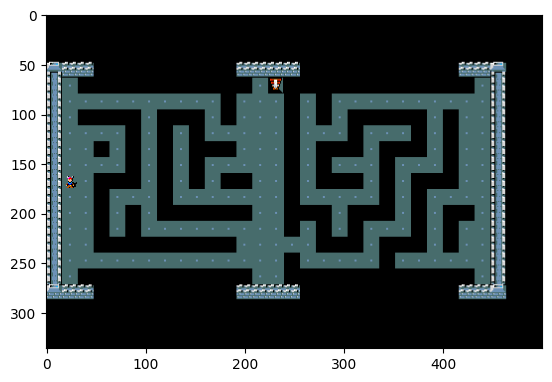

In [3]:
#Create our environment specifying the Map and what keys we have to observe 
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel", "blstats", "message"))
state = env.reset()

coordinates = [500, 500]

plt.imshow(state['pixel'][:coordinates[0], :coordinates[1]])

game_map = state['chars']
game = state['pixel']
game_stats = state['blstats']
game_mex = state['message']

game_map = np.array(game_map)

start = get_player_location(game_map)
target = get_target_location(game_map)
hp = game_stats[6]
print("Agent position:", start)
print("Target position:", target)


# Add Game Over function
def display_game_over():
    plt.text(0.5, 0.5, "Game Over: You were killed by monsters!", 
             fontsize=20, ha='center', va='center', color='red', transform=plt.gca().transAxes)

# Add ictory function
def display_victory():
    plt.text(0.5, 0.5, "Victory: You reached the target!", 
             fontsize=20, ha='center', va='center', color='green', transform=plt.gca().transAxes)

path = montecarlo_algorithm.mcts(env, start, target)
print("Computed Path:", path)

# Pass the path to `actions_from_path` if it expects a list of actions
actions = actions_from_path(start, path[1:])

image = plt.imshow(game[:coordinates[0], :coordinates[1]])
for action in actions:
    s, _, done, _ = env.step(action)  # `done` say to us when the simulation is over
    image.set_data(s['pixel'][:coordinates[0], :coordinates[1]])
    
    
    # If the simulation is done
    if done:
        # If player's hp are equal to 0 it means that he is dead
        if hp == 0: 
            display_game_over()
            break  # Interrupt the smulation

        # Else you have won    
        display_victory()
        break  # Interrupt the smulation


    # Update the game visualization
    display.display(plt.gcf())
    display.clear_output(wait=True)